<a href="https://www.kaggle.com/code/aisuko/generate-word-clouds-by-using-specific-topic?scriptVersionId=162686616" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview

Topic modeling is the process of discovering topics in a collection of documents. In this notebook, we will use sentence-Transformers to identify the topics in a collectiion of sentences, paragraphs or shot documents.

In [1]:
!pip install top2vec==1.0.34

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 45.6 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=819466 sha256=0a3b286ac650a9dd0a3c1b2fff702affcf86db75b294af7ad7a027a94893de33
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


# Loading data

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsgroups=fetch_20newsgroups(subset='all', remove=('headsers', 'footers', 'quotes'))
len(newsgroups.data)

18846

# Loading Pretrained Embedding Models 

We will choice the fastest **embedding_model** `universal-sentence-encoder`.

In [3]:
from top2vec import Top2Vec

model=Top2Vec(documents=newsgroups.data, embedding_model='universal-sentence-encoder', speed='learn', workers=8)
model

2024-02-13 04:21:50.813608: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 04:21:50.813725: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 04:21:50.981304: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-13 04:22:05,229 - top2vec - INFO - Pre-processing documents for training
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-02-13 04:22:15,960 - top2vec - INFO - Downloading universal-sentence-encoder model
2024-02-

# Get the number of Topics

In [4]:
model.get_num_topics()

117

# Get Topics

Checking if the topics list inlcudes the topic which we want to use, like `unix`. We get all the topics first.

In [5]:
model.get_topics()

(array([['recchi', 'potvin', 'ahl', ..., 'yankees', 'pens', 'ulf'],
        ['cmu', 'uiuc', 'univ', ..., 'amherst', 'harvard', 'beck'],
        ['spacecraft', 'jpl', 'orbiter', ..., 'tmc', 'beam', 'csd'],
        ...,
        ['camera', 'cameras', 'kodak', ..., 'buyer', 'umich', 'manuals'],
        ['nuclear', 'radiation', 'cooling', ..., 'fans', 'engine',
         'solaris'],
        ['liefeld', 'comics', 'marvel', ..., 'these', 'libraries', 'gc']],
       dtype='<U15'),
 array([[0.42158645, 0.37643033, 0.35552108, ..., 0.25088096, 0.2478561 ,
         0.24685708],
        [0.25145066, 0.23397942, 0.20550007, ..., 0.14173841, 0.14153148,
         0.14121729],
        [0.43621245, 0.41464928, 0.38045973, ..., 0.20385805, 0.20238197,
         0.20195669],
        ...,
        [0.33887538, 0.28470895, 0.27828574, ..., 0.15151176, 0.15020943,
         0.15020236],
        [0.4012798 , 0.33482805, 0.31733197, ..., 0.15612867, 0.15481997,
         0.15469752],
        [0.35125518, 0.3346365

We check if the specifc topic like `unix` was included in the topics list.

In [6]:
model.query_topics('unix', num_topics=1)

([array(['unix', 'public', 'solaris', 'bsd', 'access', 'denver', 'oracle',
         'cmu', 'tor', 'linux', 'plaintext', 'publicly', 'library', 'macs',
         'libraries', 'aix', 'gcc', 'gnu', 'unc', 'freenet', 'kernel',
         'cryptography', 'cryptographic', 'utilities', 'acm', 'berkeley',
         'ubc', 'private', 'athens', 'permission', 'cu', 'cp', 'aclu',
         'terminal', 'nyx', 'jpl', 'node', 'dg', 'univ', 'mit', 'ieee',
         'proprietary', 'universities', 'usenet', 'yale', 'lib', 'ut', 'gs',
         'eff', 'liberties'], dtype='<U15')],
 [array([0.297357  , 0.2918148 , 0.2290258 , 0.22634263, 0.22443604,
         0.2240077 , 0.2189056 , 0.21350259, 0.207287  , 0.20607442,
         0.20187858, 0.20135069, 0.20051816, 0.19889936, 0.19666156,
         0.19434473, 0.19233389, 0.1918552 , 0.1899103 , 0.1891954 ,
         0.18636668, 0.18410051, 0.18331732, 0.18201284, 0.17946482,
         0.17766593, 0.17761815, 0.17719485, 0.17685413, 0.17660788,
         0.17545055, 0.1

## Checking the similar keywords

In [7]:
words, word_scores=model.similar_words(keywords=['unix'], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f'{word} {score}')

linux 0.6639789569719832
bsd 0.622007352953257
gnu 0.527563793624263
macs 0.5006209655140692
solaris 0.4958538013302821
printf 0.4798362505165912
msdos 0.4676875857020839
windows 0.46747011746623257
macintosh 0.4671046896266494
kernel 0.4576325844172163
coprocessor 0.4419563006667565
powerbook 0.4398566439633346
mac 0.4377350532083359
fprintf 0.43566054248713626
ascii 0.43314007871172033
risc 0.42803784203726614
telnet 0.4268882775413588
script 0.42625549901249726
files 0.42256110225963334
shell 0.4224072242867557


# Generate Word Clouds

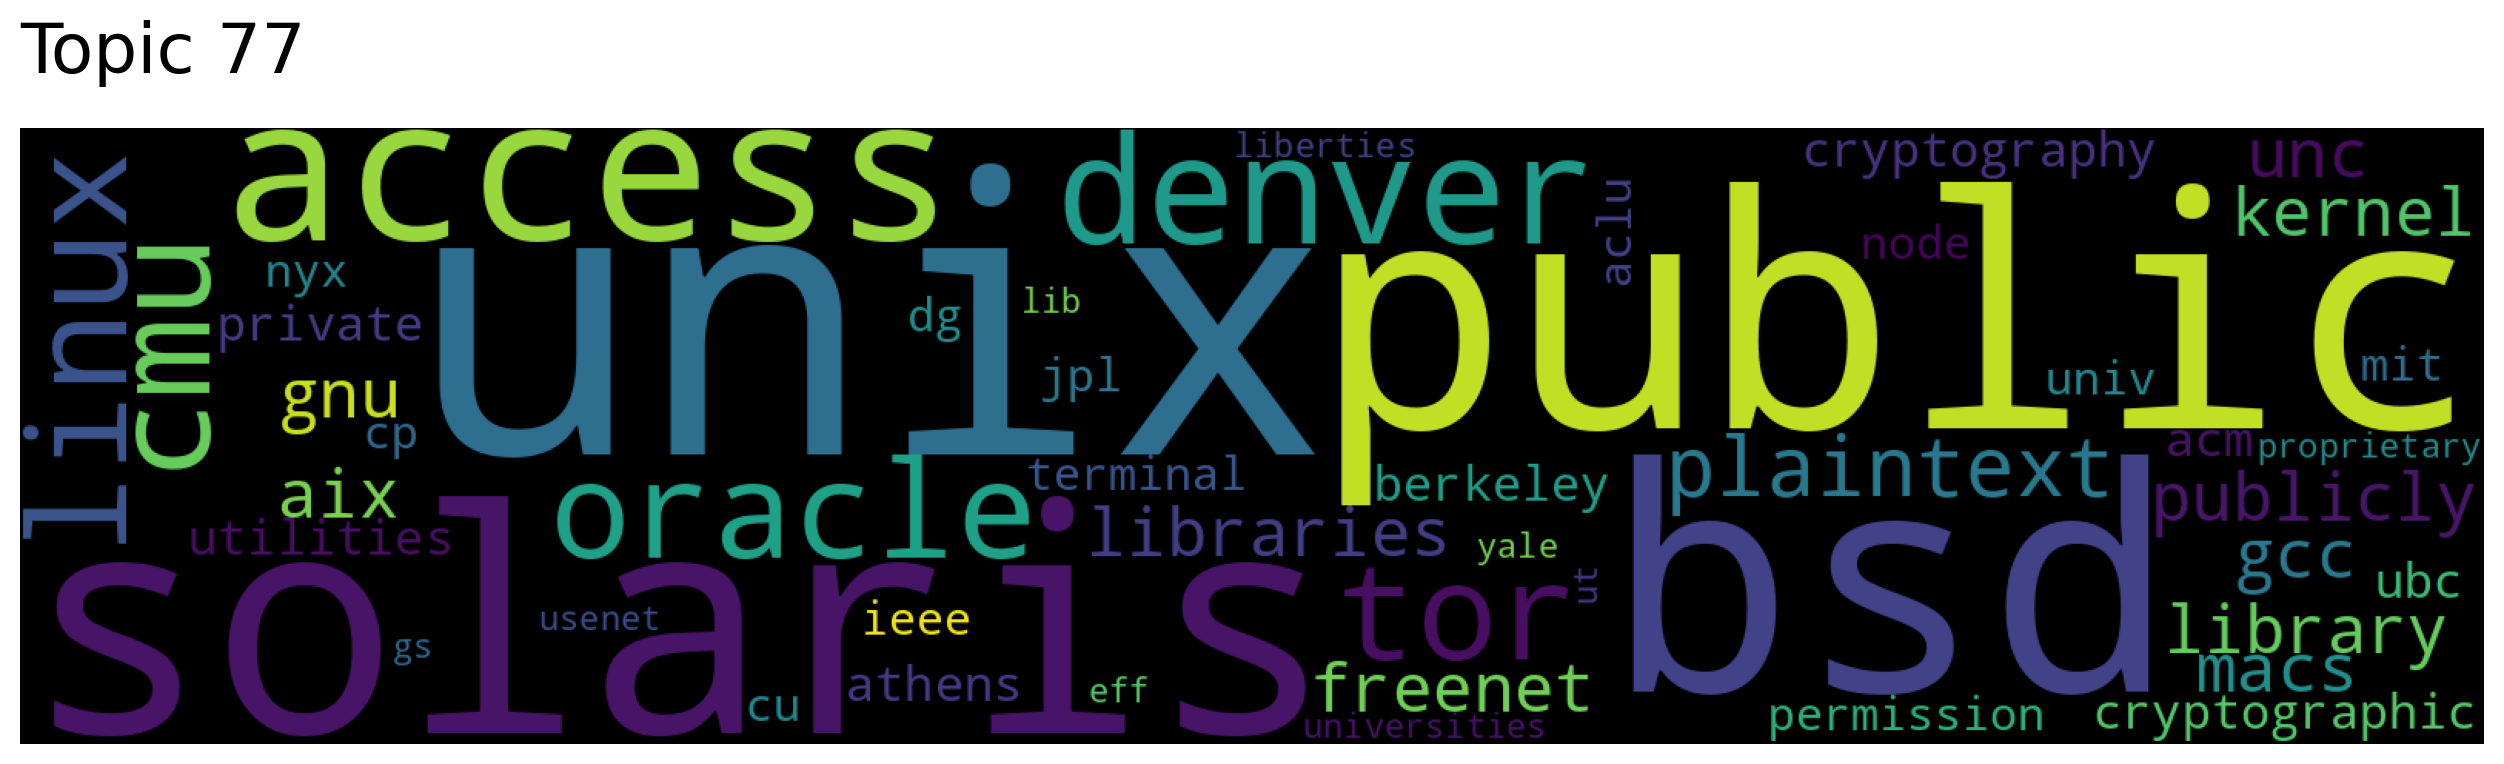

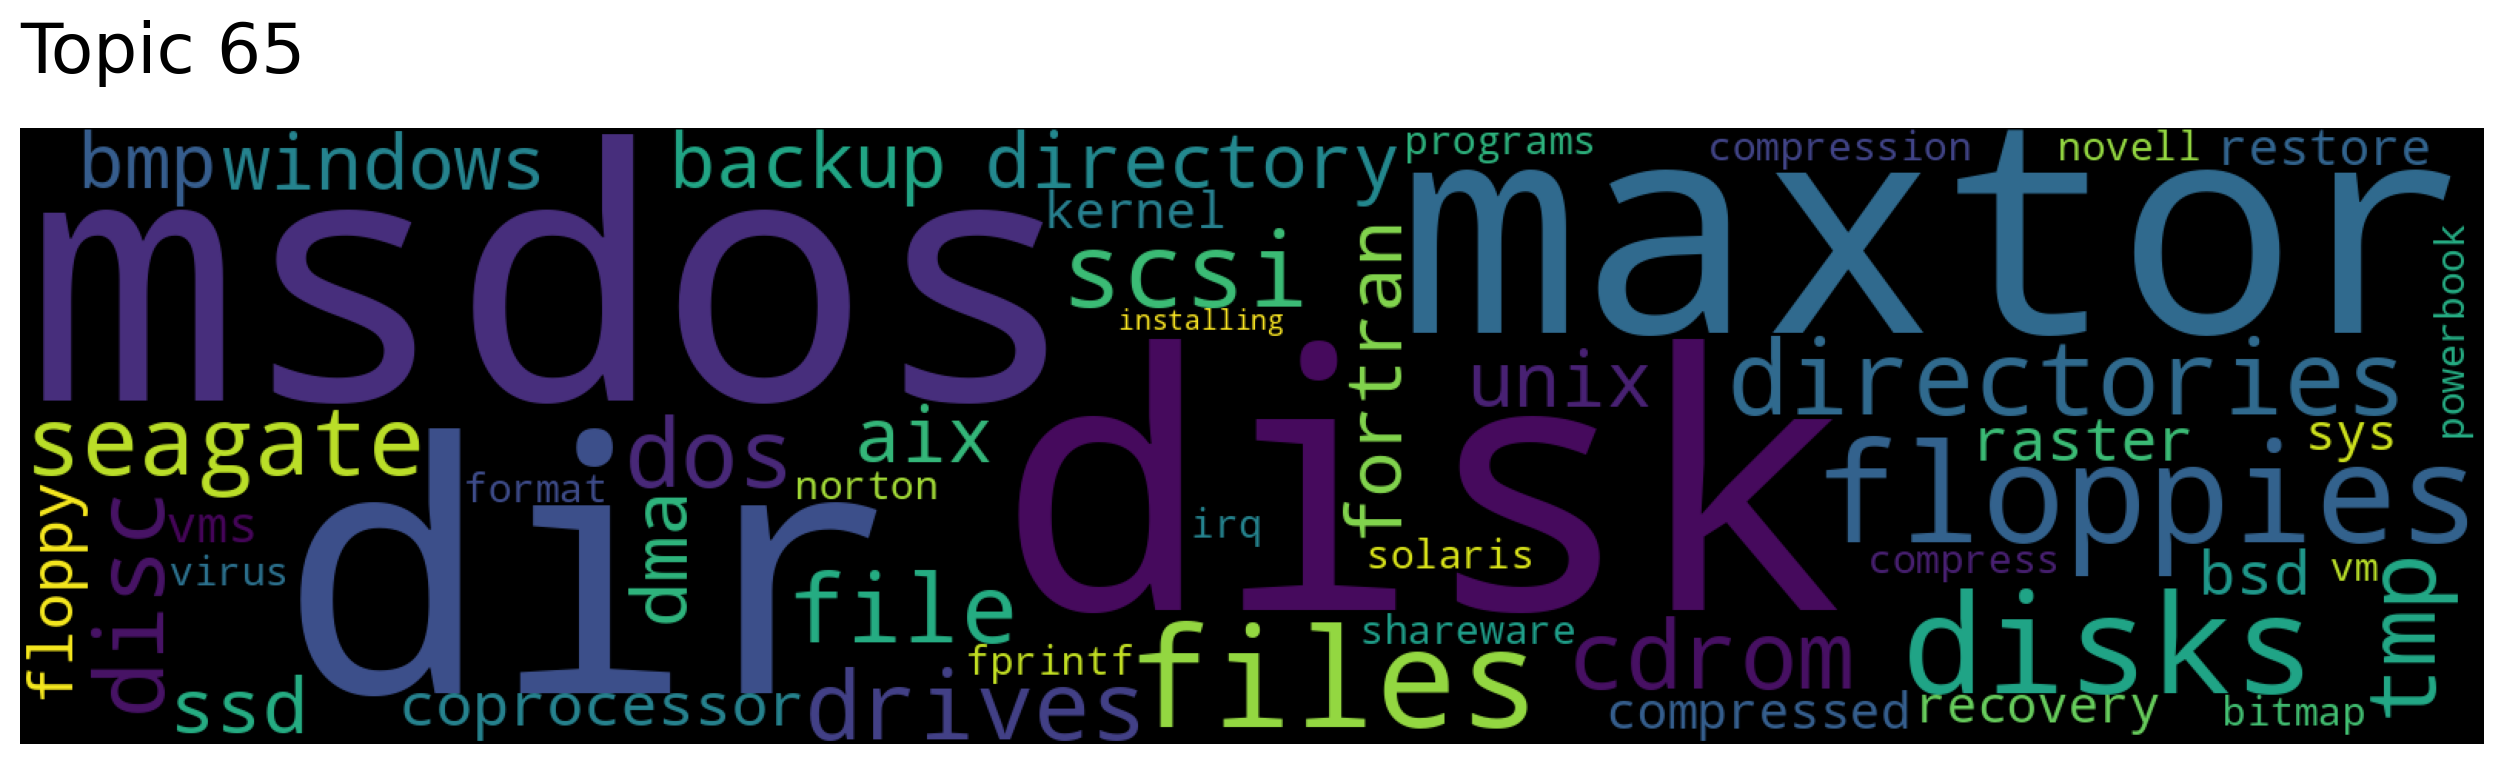

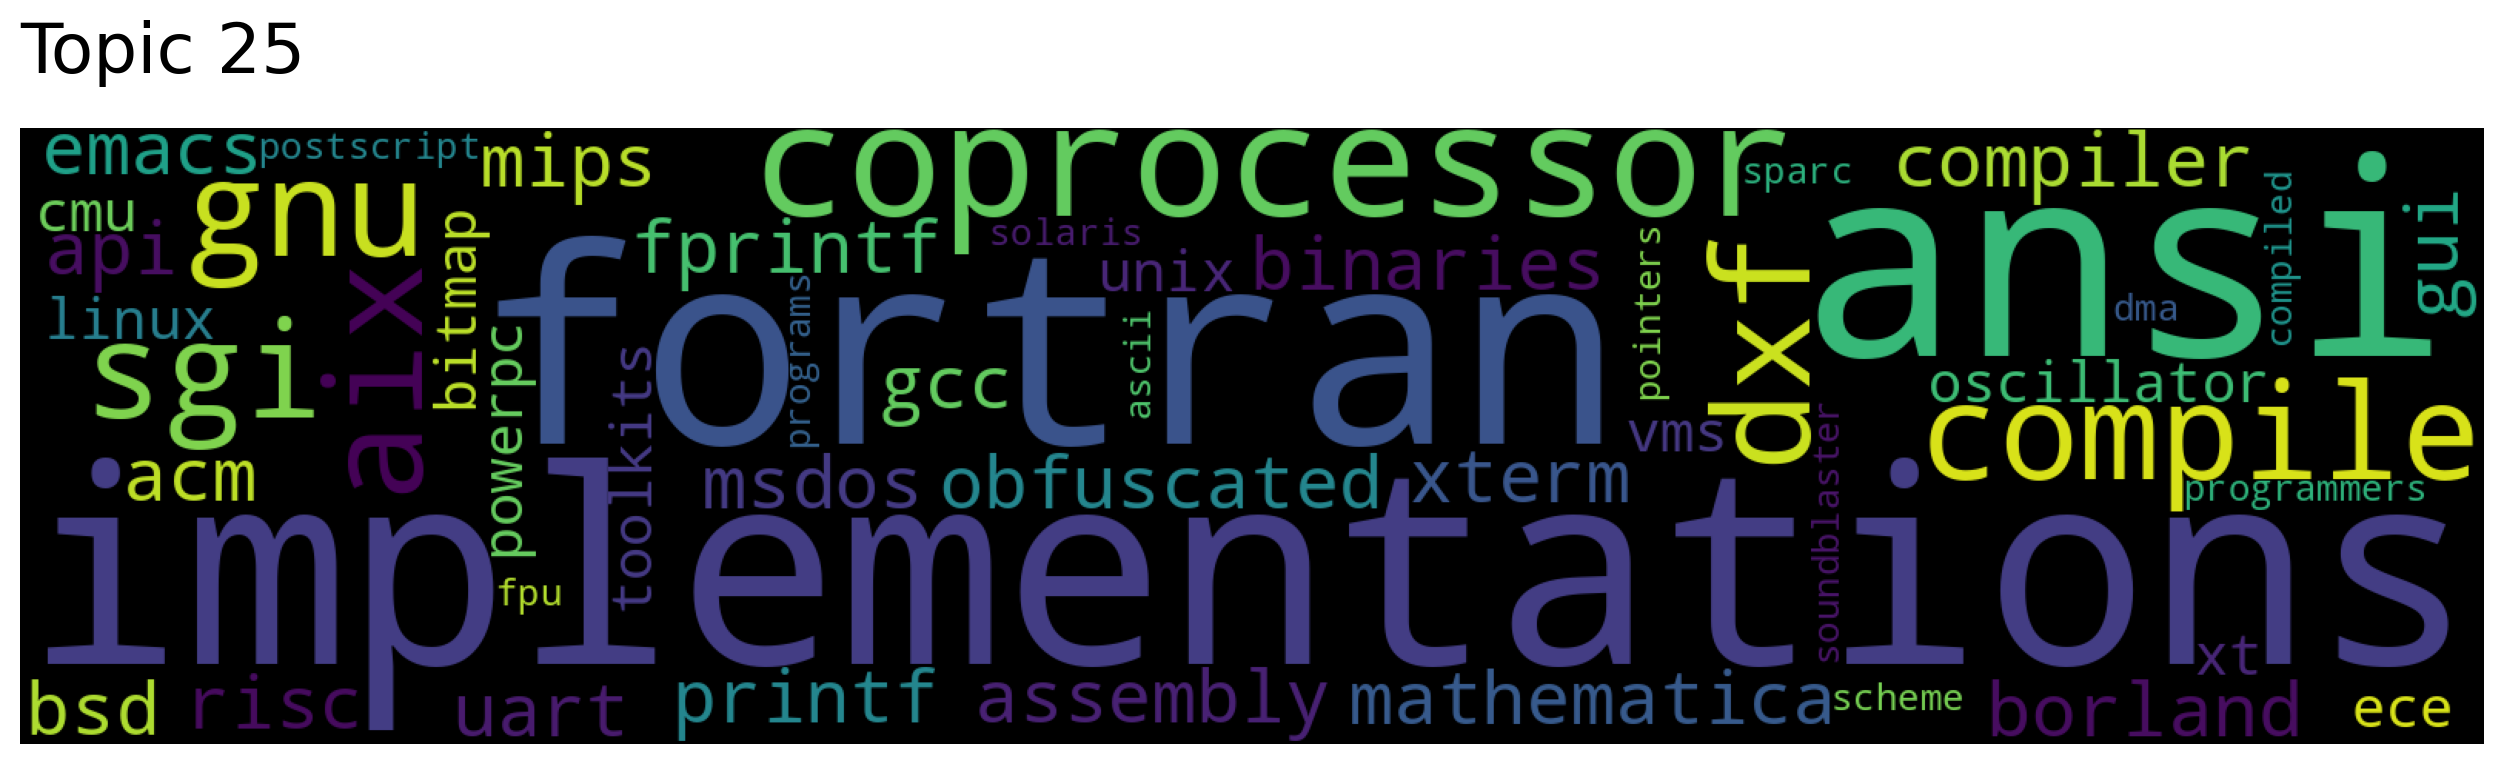

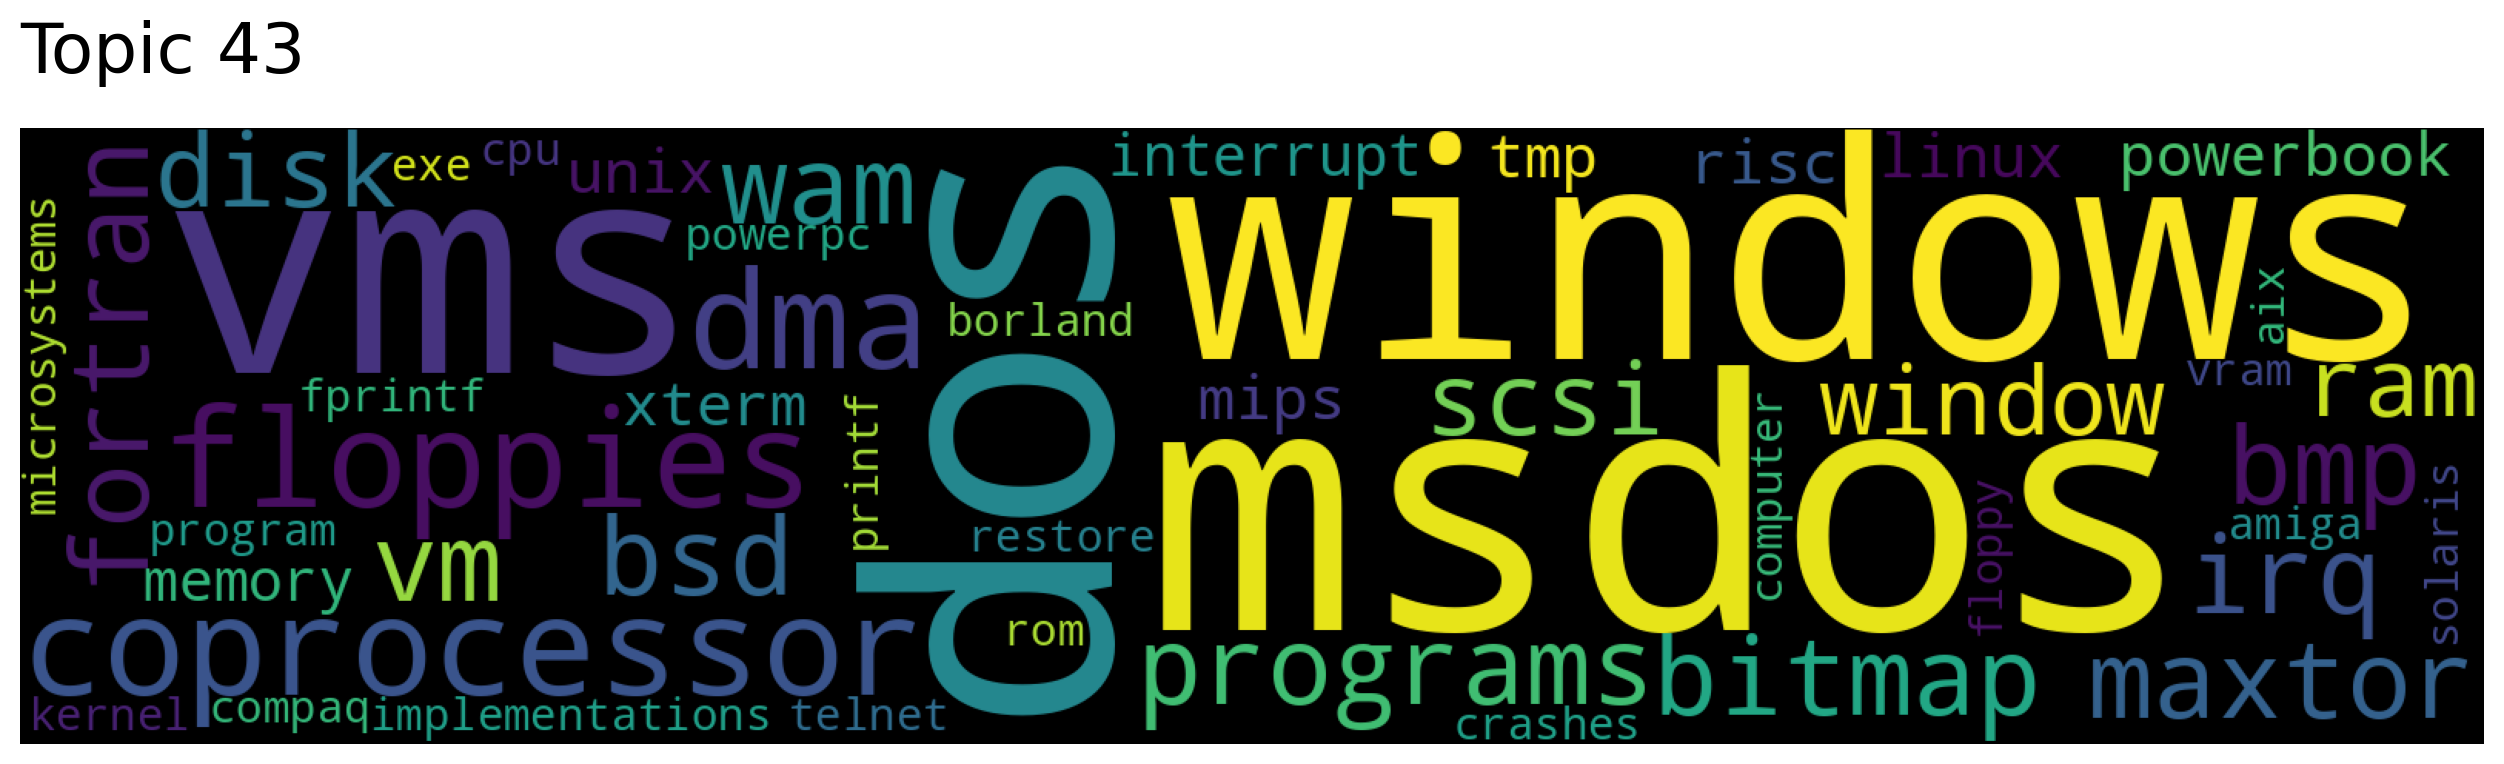

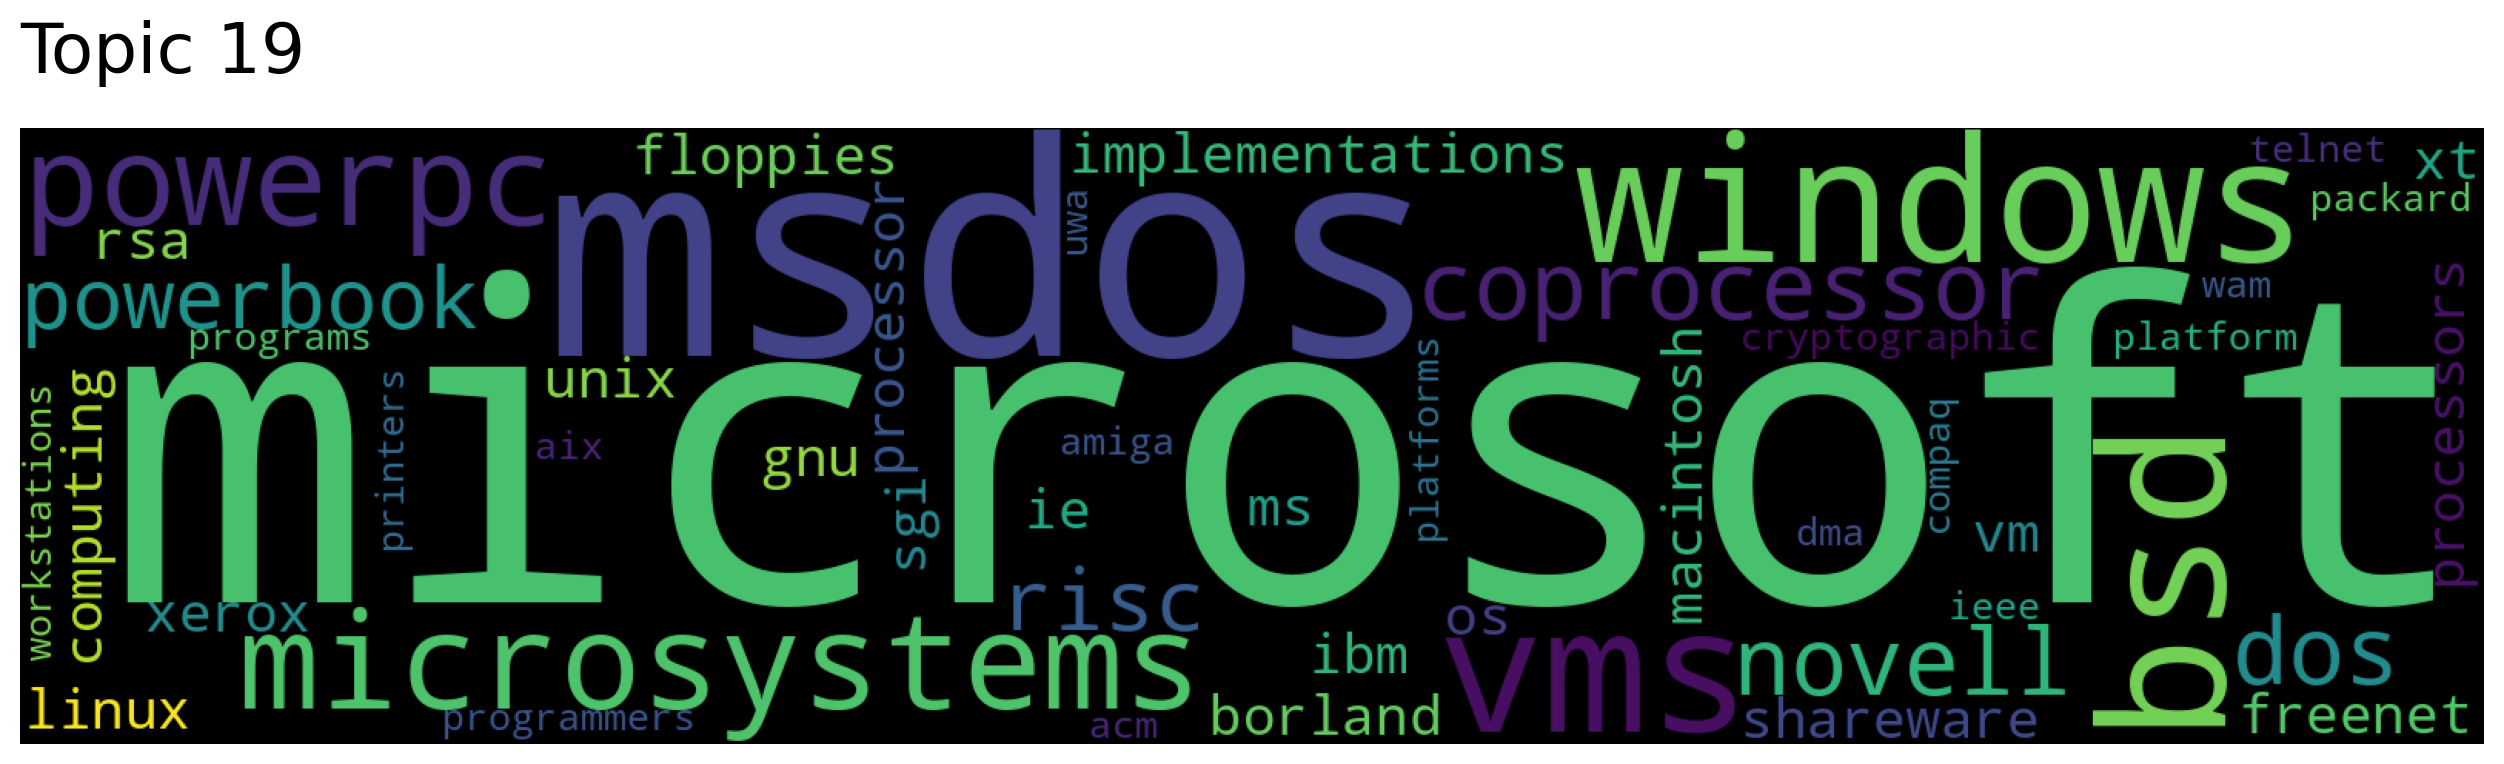

In [8]:
topic_words, word_scores, topic_scores, topic_nums=model.search_topics(keywords=['unix'], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

# Semantic Search Documents by Keywords

Search documents for content similar to `unix`.

In [9]:
documents, document_scores, document_ids=model.search_documents_by_keywords(keywords=['unix'], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f'Document: {doc_id}, Score: {score}')
    print('---------------')
    print(doc)
    print('---------------')
    print()

Document: 6332, Score: 0.45367726776146344
---------------
From: xtifr@netcom.com (Chris Waters)
Subject: Re: PC/Geos, Windows, OS/2, and Unix/X11
Organization: NETCOM On-line Communication Services (408 241-9760 guest)
Lines: 58





                                                       ^
                                                      Novell is at least
                                                      demoing windows apps
                                                      running under UNIXWare.


                                   ^           ^
                                Try MKS.     MKS &
                                           others, esp.
                                              EMX

Note here: the MKS toolkit (for DOS/Windows & OS/2) gives you a good
suite of standard UNIX utilities.  There are other similar systems from
other vendors as well.  The EMX system for OS/2 gives you most of the
standard UNIX system calls for recompiling your UNIX programs 